# TRP Q&A EDA

In [1]:
import os
import nltk
import json
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer, LancasterStemmer, PorterStemmer

In [9]:
os.getcwd()
os.chdir('C:/Users/akadali/Desktop/Deep_NLP/MLG_Capstone_ChatBot/ChatBot_GoogleW2V')

In [10]:
#All Apostopes should be replaced with an apostrope on the keboard to avoid unicode characters eg: \X92
#Data Ppeprocessing on CSV File
data = pd.read_csv("trp_faq_dataset.csv", encoding = 'latin1')

In [12]:
data.head()


#data.question[143] #To check if there were any \x characters
#data.columns
#data.shape


,question,answer,category,comments,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Which candidates do not qualify for the Talent...,1.\tGraduate or undergraduate students hired t...,Eligibility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,who are ineligible for referral program,1.\tGraduate or undergraduate students hired t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,who are ineligible for referral bonus program,1.\tGraduate or undergraduate students hired t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,who could be ineligible for referral bonus awards,1.\tGraduate or undergraduate students hired t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,who are ineligible for referral Awards,1.\tGraduate or undergraduate students hired t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Removing last four unused columns
data = data[['question','answer']]
#shape of the data after removing last four empty columns
data.shape

(441, 2)

In [14]:
#Check for null Values
data.isnull().sum()

question    0
answer      6
dtype: int64

In [16]:
#Specifying the field datatype
for col in ['question', 'answer']:
    data[col] = data[col].astype(str)

Text Mining/Text Analytics
-------

Data Clean-up
**Common data cleaning steps on all text:**
* Make text all lower case
* Remove punctuation
* Remove numerical values
* Remove common non-sensical text (/n)
* Remove stop words
* Tokenize text

**More data cleaning steps after tokenization:**
* Stemming / lemmatization
* Parts of speech tagging
* Create bi-grams or tri-grams
* Deal with typos
* And mor

In [17]:
#Converting data to lower case
import string
for col in ['question', 'answer']:
    data[col] = data[col].apply(lambda x: x.lower())

In [19]:
#Removing Punctuations
import re
puncs = string.punctuation

puncs = puncs + "’'`" # adding more punctuations that may not present in the string.punctuations
for col in ['question', 'answer']:
    data[col] = data[col].apply(lambda x: re.sub('[%s]'%re.escape(puncs), ' ', x))

In [20]:
print(puncs)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~’'`


In [21]:
#The text data has a lot of contractions and all of them need to be cleared to 
#avoid any unsual characters after preprocessing the text
def text_clean(text):
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    return text

for col in ['question', 'answer']:
    data[col] = data[col].apply(lambda x: text_clean(x))

In [22]:
#We still have some extra spaces present in the data. Let’s remove them
#Removing extra spaces that might have been created while removing punctuations
for col in ['question', 'answer']:
    data[col] = data[col].apply(lambda x: re.sub('  +',' ',x))

In [23]:
#Removing Stop Words
stops = nltk.corpus.stopwords.words('english')
for col in ['question', 'answer']:
    data[col] = data[col].apply(lambda x: " ".join(w for w in x.split() if w not in stops))

In [24]:
#Let's see how our questions look after cleaning
data.tail()

,question,answer
436,u,good thank
437,r,good thank
438,good,good know tell help
439,good thank,good know tell help
440,good thanks asking,good know tell help


In [27]:
data.head()

,question,answer
0,candidates qualify talent referral program,1 graduate undergraduate students hired campus...
1,ineligible referral program,1 graduate undergraduate students hired campus...
2,ineligible referral bonus program,1 graduate undergraduate students hired campus...
3,could ineligible referral bonus awards,1 graduate undergraduate students hired campus...
4,ineligible referral awards,1 graduate undergraduate students hired campus...


In [25]:
#Merge Questions and Answers columns into one
qa_data = data['question'] + " " + data['answer']

In [26]:
#quick check
qa_data.head()
qa_data.iloc[143]

'situation referred someone working deloitte turns referral\x92s start date separate deloitte submitted application \x93verify alumni eligibility\x94 twice received emails phone number contact discuss referral bonus help referral hire firm 30 days validation process beginsthe validation process begins referral candidate starts bonus processed validation process completed referral employed 30 days validation process requires review approval various information bonus paid validation complete eligible referral bonus award amount processed along appropriate paycheck know eligibility bonus payout status please write email referral team via outlook ustalentreferralprogram deloitte com candidate name email address'

In [28]:
#There are still a number of \X97,\X94, \X93 chars in the text. we need to remove them before creating a corpus
for col in ['question', 'answer']:
    data[col] = data[col].apply(lambda x: re.sub('\x97', '', x))
    data[col] = data[col].apply(lambda x: re.sub('\x96', '', x))
    data[col] = data[col].apply(lambda x: re.sub('\x95', '', x))
    data[col] = data[col].apply(lambda x: re.sub('\x94', '', x))
    data[col] = data[col].apply(lambda x: re.sub('\x93', '', x))
    data[col] = data[col].apply(lambda x: re.sub('\x92', '', x))

In [29]:
#Merge Questions and Answers columns once again
qa_data = data['question'] + " " + data['answer']

In [30]:
qa_data.iloc[143]

'situation referred someone working deloitte turns referrals start date separate deloitte submitted application verify alumni eligibility twice received emails phone number contact discuss referral bonus help referral hire firm 30 days validation process beginsthe validation process begins referral candidate starts bonus processed validation process completed referral employed 30 days validation process requires review approval various information bonus paid validation complete eligible referral bonus award amount processed along appropriate paycheck know eligibility bonus payout status please write email referral team via outlook ustalentreferralprogram deloitte com candidate name email address'

In [31]:
print(qa_data.tail())

436                              u good thank
437                              r good thank
438                  good good know tell help
439            good thank good know tell help
440    good thanks asking good know tell help
dtype: object


In [32]:
#Creating Data Corpus
qa_corpus = " "
for i in range(len(qa_data)):
    qa_corpus = qa_corpus + qa_data[i]

In [33]:
#tokenizing the text
from nltk.tokenize import word_tokenize
tokens = word_tokenize(qa_corpus)
print("Total number of words in the corpus - ", len(tokens))

Total number of words in the corpus -  19579


Let's see how many unique english words our corpus has got

In [34]:
#Getting Lemmas for corpus tokens
lemma = WordNetLemmatizer()
qa_lems = " ".join(lemma.lemmatize(w, pos = 'v') for w in tokens)
qa_lems

#Function to get the unique list of words
def unique_list(text):
    unique_list = []
    for w in text.split():
        if w not in unique_list:
            unique_list.append(w)
    return unique_list

unique_lems = unique_list(qa_lems)
print("Number of unique (root) words in corpus - ", len(unique_lems))

Number of unique (root) words in corpus -  1576


In [35]:
#Finding word frequencies of all words in the corpus tokens
from nltk.probability import FreqDist
fdist = FreqDist()

for word in tokens:
    fdist[word] += 1

In [36]:
fdist

FreqDist({'referral': 1186, 'bonus': 430, 'candidate': 360, 'deloitte': 347, 'manager': 343, 'recruiting': 330, 'team': 322, 'validation': 322, 'campus': 320, 'process': 314, ...})

In [41]:
#Top 20 tokens with highest frequency 

fdist_top20 = fdist.most_common(20)
word_freq = pd.DataFrame(fdist_top20)
word_freq.columns = ['word','freq']

In [43]:
word_freq

,word,freq
0,referral,1186
1,bonus,430
2,candidate,360
3,deloitte,347
4,manager,343
5,recruiting,330
6,team,322
7,validation,322
8,campus,320
9,process,314


# EDA Visualizations to understand the text data better

In [47]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

In [48]:
faq = pd.read_csv("trp_faq_dataset.csv", encoding = 'latin1')

In [49]:
cat_freq = pd.DataFrame(faq['category'].value_counts())
cat_freq = cat_freq.reset_index()
cat_freq

,index,category
0,Program,78
1,Bonus not received,63
2,greeting,40
3,resume miss,24
4,Eligibility,23
5,Campus_Interns,22
6,Bonus,19
7,Status,16
8,Position not found,15
9,program,15


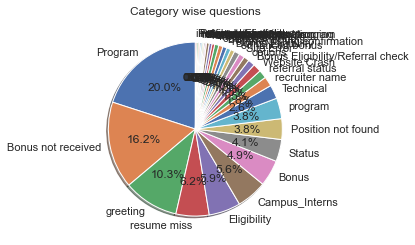

In [50]:
#Pie chart to reveal the proportion of category wise questions
plt.title("Category wise questions")
plt.pie(cat_freq['category'], labels = cat_freq['index'], autopct='%1.1f%%', shadow = True, startangle = 90)
plt.show()

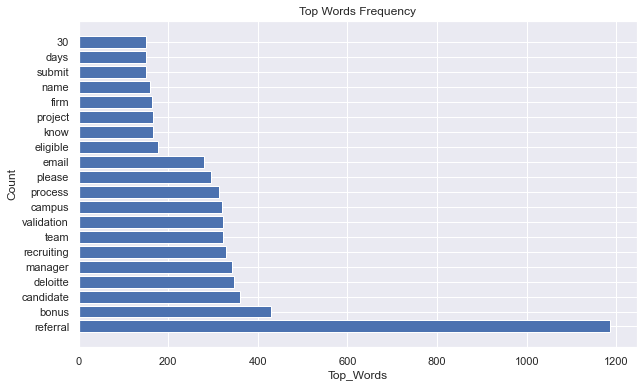

In [51]:
#Bar Chart to show the top 20 most frequent words
plt.rcParams['figure.figsize'] = [10, 6]
plt.barh(word_freq['word'],word_freq['freq'])
plt.xlabel("Top_Words")
plt.ylabel("Count")
plt.title("Top Words Frequency")
plt.show()

Observations
------------
* From the above list, referral is the most occuring word - which is obvious as this whole project is about Talent referral program.
* Following 'referral', 'recruiting','manager' are more frequently occuring words in the corpus, which indicates that the corpus has more Q&As around getting point of contacts for specific positions.
* 'campus' is the next frequently occured word in the corpus - Answers for 'campus_intern' questions have a list of recruiter names with their job titles as 'campus recruiter'.
* 'bonus' word s appeared for 77 times in the corpus - mostly appears in Q&A related to referral bonus awards.


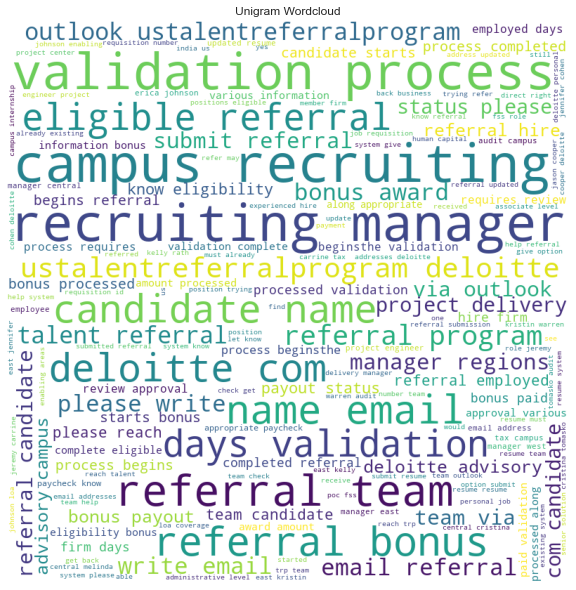

In [52]:
#Let's Generate a wordcloud to observer the highligted words over the entire corpus
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stops, 
                min_font_size = 10).generate(qa_corpus)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.title("Unigram Wordcloud")
plt.tight_layout(pad = 0) 
plt.show() 

In [53]:
#Lets get the bigrams and trigrams
from nltk import ngrams
bigrams = list(ngrams(qa_corpus.split(), 2))
trigrams = list(ngrams(qa_corpus.split(), 3))

bigrams = pd.DataFrame(bigrams)
bigrams = bigrams[0] + "_" + bigrams[1] 

bigram_words = ' '
for val in bigrams:
    val = str(val)
    tokens = val.split()
    bigram_words += " ".join(tokens)+" "
    
bigram_words

' candidates_qualify qualify_talent talent_referral referral_program program_1 1_graduate graduate_undergraduate undergraduate_students students_hired hired_campus campus_recruiting recruiting_process process_see see_2 2_individuals individuals_hired hired_experienced experienced_position position_within within_six six_months months_completing completing_graduate graduate_degree degree_professional professional_experience experience_3 3_candidates candidates_already already_submitted submitted_firm firm_another another_employee employee_search search_firm firm_candidate candidate_submitted submitted_already already_active active_recruiting recruiting_process process_please please_remember remember_candidates candidates_may may_solicited solicited_deloitte deloitte_clients clients_4 4_deloitte deloitte_employees employees_worked worked_client client_permitted permitted_submit submit_referrals referrals_client client_2 2_years years_leaving leaving_client client_joining joining_deloitte 

In [54]:
#Top 20 bigrams
bigrams.value_counts()[:20]

campus_recruiting                   282
recruiting_manager                  270
validation_process                  256
referral_team                       181
referral_bonus                      155
name_email                          148
30_days                             148
candidate_name                      143
deloitte_com                        141
days_validation                     126
eligible_referral                   124
ustalentreferralprogram_deloitte    121
referral_program                    117
outlook_ustalentreferralprogram     110
talent_referral                     106
email_referral                      104
please_write                        103
write_email                         102
manager_regions                      90
team_via                             83
dtype: int64

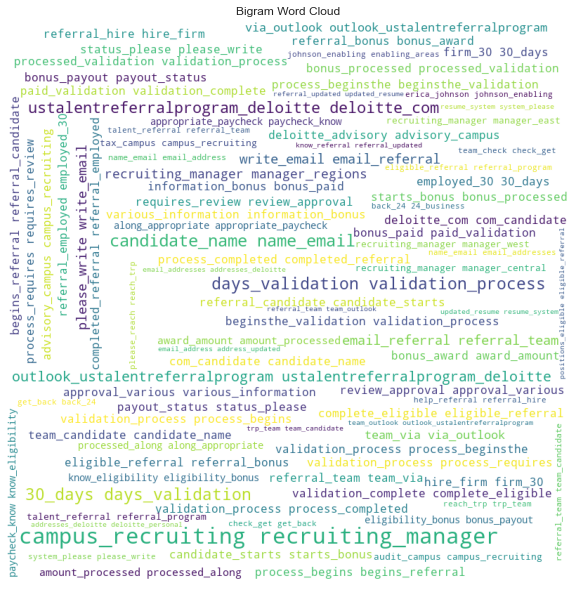

In [55]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stops, 
                min_font_size = 10).generate(bigram_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Bigram Word Cloud")
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [56]:
#Trigrams word clouds
trigrams = pd.DataFrame(trigrams)
trigrams = trigrams[0]+'_'+trigrams[1]+'_'+trigrams[2]
trigrams.value_counts()[:20]

campus_recruiting_manager                   270
candidate_name_email                        143
days_validation_process                     126
30_days_validation                          126
ustalentreferralprogram_deloitte_com        118
outlook_ustalentreferralprogram_deloitte    110
email_referral_team                         103
please_write_email                          102
write_email_referral                        102
recruiting_manager_regions                   90
team_via_outlook                             83
via_outlook_ustalentreferralprogram          83
referral_team_via                            76
com_candidate_name                           75
deloitte_com_candidate                       75
eligible_referral_bonus                      75
advisory_campus_recruiting                   72
deloitte_advisory_campus                     72
payout_status_please                         71
bonus_payout_status                          71
dtype: int64

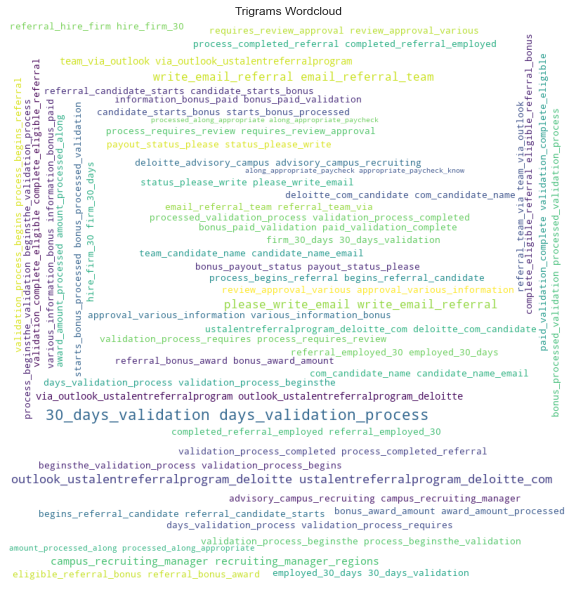

In [57]:
trigram_words = ' '
for val in trigrams:
    val = str(val)
    tokens = val.split()
    trigram_words += " ".join(tokens)+" "
    
bigram_words
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stops, 
                min_font_size = 10).generate(trigram_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Trigrams Wordcloud")
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

# Topic Modelling

In [58]:
#TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(max_df = 0.99, 
                                    max_features = 3000, 
                                    stop_words = stops, 
                                    use_idf = True, 
                                    ngram_range = (1,1))

#Create TF-IDF matrix of the corpus
tf_idf_matrix = tf_idf_vectorizer.fit_transform(qa_data)
#type(tf_idf_matrix )
#print(tf_idf_matrix.toarray())
feature_names = tf_idf_vectorizer.get_feature_names()
print(len(feature_names))
#print(feature_names)

1481


* Attempt#1
* Unigrams and 3 Topics

In [59]:
#Topic Modelling using LDA 
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 3, 
                                max_iter = 10, 
                                learning_method = 'online',
                                learning_offset = 10,
                                random_state = 1)

lda.fit(tf_idf_matrix)
lda.components_
for topic_id, topic in enumerate(lda.components_):
    print("Topic:", topic_id)
    print(" ".join(feature_names[i] for i in topic.argsort()[:20]))
    print("\n")

Topic: 0
discovery remedy lin developer isnt ame gayle brew navigate renewal suited crashes form duong functional unable cause messages function call


Topic: 1
chain col paraprofessional eo sf pass offerings gross principal millers kklimushkin extended target asset memberfirm wasnt onsite pmo brooks fakuade


Topic: 2
explanation solicited performing relevant trying course mika ice pdm mitchell chain initiate exact tufts actually steven core continue tohmatsu concern




* Attempt#2
* Topic Modelling with bigrams and trigrams - 3 Topics

In [60]:
tf_idf_ngrams = TfidfVectorizer(max_df = 0.99, 
                                max_features = 5000, 
                                stop_words = stops, 
                                use_idf = True, 
                                ngram_range = (2,3))
tf_idf_ngrams_matrix = tf_idf_ngrams.fit_transform(qa_data)
tf_idf_ngrams_matrix.shape
feature_names_ngrams = tf_idf_ngrams.get_feature_names()
lda.fit(tf_idf_ngrams_matrix)
lda.components_
for topic_id, topic in enumerate(lda.components_):
    print("Topic#", topic_id)
    print(" ".join(feature_names_ngrams[i] for i in topic.argsort()[:10]))
    print("\n")

Topic# 0
deloittenet copy affiliates bonus submitted referrals us system candidate profiles please remember may solicited deloitte imperative required talent successful referral review businesses deloitte us positions poc fss


Topic# 1
bonus help referral related referral proceed referral submission referral position deloitte lin referral recruitment let know profile without attached upload resume complete searches conducted using received emails phone


Topic# 2
independence referrals submit referral online advise best paid referrals restricted prompted upload resume successfully completed 30 enhanced bonus existing system candidate hired level lin referral




* Attempt #3
* Increasing the topics from 3 to 4 to see if the text in topics make any sense

In [61]:
lda = LatentDirichletAllocation(n_components = 4, 
                                max_iter = 10, 
                                learning_method = 'online',
                                learning_offset = 10,
                                random_state = 1)
lda.fit(tf_idf_ngrams_matrix)
lda.components_
for topic_id, topic in enumerate(lda.components_):
    print("Topic#", topic_id)
    print(" ".join(feature_names_ngrams[i] for i in topic.argsort()[:10]))
    print("\n")
    

Topic# 0
deloittenet copy must submitted current program dnet submitted referrals us talent referral given email addresses referral referral sf answers queries businesses deloitte us system candidate profiles


Topic# 1
bonus help referral referrals still us deployment yes global proceed referral submission related referral referral position deloitte upload resume complete profile without attached lin referral enhanced referral bonus


Topic# 2
submit referral online https deloittenet advise best prompted upload resume paid referrals restricted referral issue enhanced bonus per referral program referral bonus wondering site kindly


Topic# 3
referral eligibility bonus limited memberfirm includes within function recruiting manager west referral hire completed get referral submitted referral candidate entities even without posted paycheck get referral chatbot help




* Attempt #4 (Only Nouns)

* One popular trick is to look only at terms that are from one part of speech (only nouns, only adjectives, etc.). 
Check out the UPenn tag set: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [62]:
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)]
    return " ".join(all_nouns)

data_nouns = pd.Series(qa_data.apply(nouns))
data_nouns.shape
data_nouns.head()

0    candidates program graduate students campus re...
1    program graduate students campus recruiting pr...
2    bonus program graduate students campus recruit...
3    bonus awards graduate students campus recruiti...
4    awards graduate students campus recruiting pro...
dtype: object

In [63]:
#Create TF-IDF matrix of the corpus
tf_idf_nouns = TfidfVectorizer(max_df = 0.99, 
                               max_features = 3000, 
                               stop_words = stops, 
                               use_idf = True, 
                               ngram_range = (2,3))

tf_idf_nouns_matrix = tf_idf_nouns.fit_transform(data_nouns)
feature_names_nouns = tf_idf_nouns.get_feature_names()

lda_nouns = LatentDirichletAllocation(n_components = 4, 
                                      max_iter = 10, 
                                      learning_method = 'online',
                                      learning_offset = 10,
                                      random_state = 1)
lda_nouns.fit(tf_idf_nouns_matrix)
lda_nouns.components_
for topic_id, topic in enumerate(lda_nouns.components_):
    print("Topic#", topic_id)
    print(" ".join(feature_names_nouns[i] for i in topic.argsort()[:10]))
    print("\n")

Topic# 0
link access touche tohmatsu memberfirm summer position consultant consultant associate bonus cody hire referral job requisition refer resource position referral confirm status days validation candidate candidate job


Topic# 1
submit candidate profile usdc center program hi requisition information email post become please source position enter manager solution architect discussion person account friend job


Topic# 2
talentondemand pages view team reachout position team relationship entities manager talent submit internship role partner firm tohmatsu memberfirm bonus validation bonuses candidates


Topic# 3
submit multiple search firm candidate please show submission system resume tod didnt want status referrals eligibility criteria weeks conditions bonus system position security process please candidates




* Attempt #5 (Nouns and Adjectives)

In [64]:
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

data_nouns_adj = pd.Series(qa_data.apply(nouns_adj))
#data_nouns_adj.shape
data_nouns_adj.head()

0    candidates talent referral program graduate un...
1    ineligible referral program graduate undergrad...
2    ineligible referral bonus program graduate und...
3    referral bonus awards graduate undergraduate s...
4    ineligible referral awards graduate undergradu...
dtype: object

In [65]:
tf_idf_nouns_adj = TfidfVectorizer(max_df = 0.99, 
                                   max_features = 5000, 
                                   stop_words = stops, 
                                   use_idf = True, 
                                   ngram_range = (2,3))

tf_idf_nouns_adj_matrix = tf_idf_nouns_adj.fit_transform(data_nouns_adj)
feature_na = tf_idf_nouns_adj.get_feature_names()

lda_noun_adj = LatentDirichletAllocation(n_components = 4, 
                                         max_iter = 10, 
                                         learning_method = 'online',
                                         learning_offset = 10,
                                         random_state = 1)
lda_noun_adj.fit(tf_idf_nouns_adj_matrix)
lda_noun_adj.components_
for topic_id, topic in enumerate(lda_noun_adj.components_):
    print("Topic#", topic_id)
    print(" ".join(feature_na[i] for i in topic.argsort()[:20]))

Topic# 0
referrals trp data science technology team enter candidate referral bonus standard steps refer experienced xiaoyi christina deloitte team referral associate analyst analyst project delivery analyst summer internship rules portal robert hedrick manager ii solution bonus amount system thanks please check status reach receive bonus award respective lead approval someone tell disparity submit candidate deloitte
Topic# 1
center senior resumes resume date able let referral january role referral person account regards status job positions cash select technology underorganization employee firm referral code keywords cl5 referral bonus referral candidate current lenders dttl site page tod message confirm e20natsmgrcs069 cl5 search combination potential referral talent referral resume
Topic# 2
eligible get advise spouses candidates offers firm attest payroll weeks payroll referrals name please search desc eleanya offer hire option status emails deloitte employee referral hires number se

In [72]:
"""
Topic#0 - Program, Internship referrals
Topic#1 - Bonus payout and eligibility
Topic#2 - 
Topic#3 - Client Referrals, Submission
"""

'\nTopic#0 - Program, Internship referrals\nTopic#1 - Bonus payout and eligibility\nTopic#2 - \nTopic#3 - Client Referrals, Submission\n'

In [66]:
#Let's attempt to use CountVectorizer document-term matrix and gensim models for topic modelling

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
data_cv = cv.fit_transform(qa_data)
data_dtm = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
#data_dtm.index = qa_data.index
data_dtm


,00,000,10,1000,11,13,180,19,20,2000,...,writing,www2,xiaoyi,yay,year,years,yekaterina,yes,yesterday,zhang
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#Let's pickle the document-term matrix for further use
import pickle 
data_dtm.to_pickle("dtm.pkl")
qa_data.to_pickle("data_clean.pkl")
pickle.dump(cv, open("cv.pkl",'wb'))

In [67]:
from gensim import matutils, models
import scipy.sparse

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
#cv.vocabulary_
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [68]:
#Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term)

#LDA for num_topics = 2
lda_2 = models.LdaModel(corpus = corpus, id2word = id2word, num_topics = 2, passes = 10)
lda_2.print_topics()

[(0,
  '0.041*"referral" + 0.041*"manager" + 0.038*"campus" + 0.038*"recruiting" + 0.019*"project" + 0.018*"resume" + 0.016*"deloitte" + 0.014*"team" + 0.013*"submit" + 0.013*"regions"'),
 (1,
  '0.083*"referral" + 0.039*"bonus" + 0.030*"validation" + 0.028*"process" + 0.026*"candidate" + 0.020*"email" + 0.020*"deloitte" + 0.020*"team" + 0.014*"firm" + 0.014*"days"')]

In [69]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus = corpus, id2word = id2word, num_topics = 3, passes = 10)
lda.print_topics()

[(0,
  '0.069*"manager" + 0.062*"campus" + 0.058*"recruiting" + 0.034*"project" + 0.026*"referral" + 0.022*"regions" + 0.018*"deloitte" + 0.016*"advisory" + 0.015*"delivery" + 0.015*"johnson"'),
 (1,
  '0.070*"referral" + 0.028*"team" + 0.024*"candidate" + 0.022*"deloitte" + 0.021*"resume" + 0.018*"submit" + 0.014*"position" + 0.014*"email" + 0.014*"help" + 0.014*"talent"'),
 (2,
  '0.086*"referral" + 0.057*"bonus" + 0.045*"validation" + 0.039*"process" + 0.028*"candidate" + 0.026*"email" + 0.021*"days" + 0.021*"30" + 0.018*"processed" + 0.018*"team"')]

In [70]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus = corpus, id2word = id2word, num_topics = 4, passes = 10)
lda.print_topics()

[(0,
  '0.042*"referral" + 0.034*"team" + 0.026*"job" + 0.024*"deloitte" + 0.024*"candidate" + 0.017*"requisition" + 0.015*"check" + 0.014*"search" + 0.014*"reach" + 0.012*"hours"'),
 (1,
  '0.074*"referral" + 0.054*"resume" + 0.029*"help" + 0.027*"candidate" + 0.026*"email" + 0.023*"team" + 0.020*"updated" + 0.018*"submit" + 0.014*"know" + 0.012*"address"'),
 (2,
  '0.090*"referral" + 0.048*"bonus" + 0.040*"validation" + 0.037*"process" + 0.025*"candidate" + 0.022*"email" + 0.019*"team" + 0.019*"deloitte" + 0.019*"30" + 0.019*"days"'),
 (3,
  '0.065*"manager" + 0.059*"campus" + 0.058*"recruiting" + 0.035*"referral" + 0.031*"project" + 0.021*"regions" + 0.019*"deloitte" + 0.015*"advisory" + 0.014*"delivery" + 0.014*"johnson"')]

In [71]:
# LDA for num_topics = 4 (NOUNS ONLY)
cvn = CountVectorizer(stop_words = 'english')
data_cvn = cvn.fit_transform(data_nouns)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns = cvn.get_feature_names())

# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

#LDA with nouns and Number of topics = 2
ldan = models.LdaModel(corpus = corpusn, id2word = id2wordn, num_topics = 2, passes = 10)
ldan.print_topics()

[(0,
  '0.056*"bonus" + 0.051*"manager" + 0.048*"validation" + 0.046*"process" + 0.043*"campus" + 0.042*"recruiting" + 0.028*"deloitte" + 0.024*"candidate" + 0.023*"project" + 0.022*"days"'),
 (1,
  '0.062*"team" + 0.047*"candidate" + 0.025*"help" + 0.025*"email" + 0.024*"position" + 0.023*"job" + 0.020*"deloitte" + 0.019*"resume" + 0.019*"com" + 0.018*"requisition"')]

In [80]:
"""
#Topic#1: Campus Referrals and Referral status
#Topic#2: Referral Bonus and Eligibility
"""

'\n#Topic#1: Campus Referrals and Referral status\n#Topic#2: Referral Bonus and Eligibility\n'

In [72]:
#LDA with nouns and Number of topics = 3
ldan = models.LdaModel(corpus = corpusn, id2word = id2wordn, num_topics = 3, passes = 10)
ldan.print_topics()  

[(0,
  '0.087*"bonus" + 0.077*"validation" + 0.071*"process" + 0.042*"candidate" + 0.038*"project" + 0.036*"days" + 0.024*"firm" + 0.023*"eligibility" + 0.023*"deloitte" + 0.023*"status"'),
 (1,
  '0.063*"team" + 0.047*"candidate" + 0.027*"position" + 0.026*"job" + 0.023*"email" + 0.022*"help" + 0.022*"deloitte" + 0.021*"requisition" + 0.020*"resume" + 0.019*"com"'),
 (2,
  '0.096*"campus" + 0.092*"recruiting" + 0.091*"manager" + 0.035*"regions" + 0.030*"deloitte" + 0.030*"program" + 0.023*"johnson" + 0.023*"referrals" + 0.018*"tax" + 0.017*"audit"')]

In [82]:
"""
Topic#1: Referral Program and Status
Topic#2: Referral Eligibility and requisition questions
Topic#3: Campus Referrals and Referral Status
"""

'\nTopic#1: Referral Program and Status\nTopic#2: Referral Eligibility and requisition questions\nTopic#3: Campus Referrals and Referral Status\n'

In [73]:

"""LDA with nouns and Number of topics = 4"""
ldan = models.LdaModel(corpus = corpusn, id2word = id2wordn, num_topics = 4, passes = 10)
ldan.print_topics()  

[(0,
  '0.095*"campus" + 0.092*"recruiting" + 0.089*"manager" + 0.035*"regions" + 0.029*"help" + 0.025*"deloitte" + 0.023*"johnson" + 0.023*"team" + 0.022*"resume" + 0.019*"program"'),
 (1,
  '0.120*"project" + 0.056*"delivery" + 0.051*"manager" + 0.044*"solution" + 0.040*"analyst" + 0.028*"levels" + 0.027*"center" + 0.025*"specialist" + 0.025*"awards" + 0.025*"engineer"'),
 (2,
  '0.095*"bonus" + 0.085*"validation" + 0.079*"process" + 0.043*"candidate" + 0.039*"days" + 0.034*"deloitte" + 0.031*"firm" + 0.026*"status" + 0.025*"eligibility" + 0.024*"team"'),
 (3,
  '0.062*"candidate" + 0.061*"team" + 0.034*"job" + 0.033*"email" + 0.027*"position" + 0.026*"requisition" + 0.023*"deloitte" + 0.019*"check" + 0.018*"com" + 0.017*"number"')]

In [84]:
"""
Topic#1: Referral Bonus 
Topic#2: Program, Job positions and eligibility
Topic#3: Referral status and positions
Topic#4: Campus referrals
"""

'\nTopic#1: Referral Bonus \nTopic#2: Program, Job positions and eligibility\nTopic#3: Referral status and positions\nTopic#4: Campus referrals\n'

* Topics obtained from the above are not making complete sense but still better than previous results. 
* Still, two or more topics are mixed up in each topic classification in the above.
* Let's the try the same algorithm with both Nouns and Adjectives

In [85]:
"""data_nouns_adj"""
"""LDA with Nouns and Adjectives"""
cvna = CountVectorizer(stop_words = 'english')
dat_cvna = cvna.fit_transform(data_nouns_adj)
data_dtna = pd.DataFrame(dat_cvna.toarray(), columns = cvna.get_feature_names())

# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [86]:
"""LDA with nouns & adjectives - no. of topics = 2"""
ldna = models.LdaModel(corpus = corpusna, id2word = id2wordna, num_topics = 2, passes = 10)
ldna.print_topics()

[(0,
  '0.048*"referral" + 0.047*"manager" + 0.045*"campus" + 0.045*"recruiting" + 0.022*"referrals" + 0.020*"eligible" + 0.019*"deloitte" + 0.019*"bonus" + 0.018*"program" + 0.017*"regions"'),
 (1,
  '0.099*"referral" + 0.038*"team" + 0.036*"candidate" + 0.022*"email" + 0.016*"job" + 0.016*"requisition" + 0.016*"position" + 0.014*"check" + 0.013*"number" + 0.012*"talent"')]

In [87]:
"""LDA with nouns & adjectives - no. of topics = 3"""
ldna_3 = models.LdaModel(corpus = corpusna, id2word = id2wordna, num_topics = 3, passes = 10)
ldna_3.print_topics()

[(0,
  '0.116*"referral" + 0.047*"team" + 0.047*"candidate" + 0.027*"email" + 0.020*"requisition" + 0.019*"job" + 0.019*"position" + 0.018*"check" + 0.016*"number" + 0.013*"trp"'),
 (1,
  '0.067*"manager" + 0.061*"campus" + 0.060*"recruiting" + 0.035*"referral" + 0.023*"regions" + 0.017*"talent" + 0.016*"advisory" + 0.016*"program" + 0.015*"johnson" + 0.014*"deloitte"'),
 (2,
  '0.059*"referral" + 0.035*"bonus" + 0.031*"eligible" + 0.030*"referrals" + 0.029*"firm" + 0.024*"member" + 0.022*"deloitte" + 0.020*"entities" + 0.020*"program" + 0.019*"client"')]

In [ ]:
"""
Topic#1: campus, referral status, requisitions
Topic#2: program eligibility, bonus awards 
Topic#3: program and client related inquiries
"""

In [88]:
"""LDA with nouns & adjectives - no. of topics = 4"""
ldna_4 = models.LdaModel(corpus = corpusna, id2word = id2wordna, num_topics = 4, passes = 10)
ldna_4.print_topics()

[(0,
  '0.103*"referral" + 0.048*"team" + 0.037*"candidate" + 0.030*"email" + 0.021*"job" + 0.019*"requisition" + 0.019*"position" + 0.018*"check" + 0.017*"number" + 0.016*"trp"'),
 (1,
  '0.095*"campus" + 0.093*"recruiting" + 0.090*"manager" + 0.036*"regions" + 0.025*"advisory" + 0.024*"johnson" + 0.020*"deloitte" + 0.018*"tax" + 0.018*"west" + 0.018*"central"'),
 (2,
  '0.034*"entities" + 0.034*"firm" + 0.030*"client" + 0.029*"clients" + 0.027*"bonus" + 0.027*"referral" + 0.024*"referrals" + 0.023*"member" + 0.022*"dttl" + 0.017*"approval"'),
 (3,
  '0.108*"referral" + 0.038*"program" + 0.035*"talent" + 0.028*"eligible" + 0.026*"candidate" + 0.022*"referrals" + 0.019*"bonus" + 0.015*"employees" + 0.015*"deloitte" + 0.015*"positions"')]

In [ ]:
"""
Topic#1: REquisition number
Topic#2: campus and entry level
Topic#3: Client related questions
Topic#4: Program and eligibility
"""